# Prediction du churn dans le télecom 

## yahiaoui tinhinane

In [53]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn           as sns   # For interactive plots
import matplotlib.ticker as mtick # For specifying axes ticks
from sklearn.model_selection import train_test_split   #  To split train/test
from sklearn.svm import SVC                            #  For SVM
from sklearn.metrics import accuracy_score             #  Accuracy
from sklearn.metrics import confusion_matrix           #  confusion matrix
from sklearn import metrics 

In [13]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [14]:
churn.shape

(7043, 21)

In [15]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
churn


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# TRAITEMENT DE DONNÉES 

In [17]:
#  supprimer les données non pertinentes, il peut y avoir des données incluses qui ne sont pas nécessaires pour améliorer les résultat

# dans cette ensemble de données nous avons le customerID par exemple , comme cela n'influence pas sur les résultat 

In [18]:
del churn['customerID']

In [19]:
churn.shape

(7043, 20)

In [20]:
#il est important de traiter les données manquantes 

In [21]:
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
churn.eq(' ').any(axis=0)

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [23]:
churn['TotalCharges'].str.count(' ').sum()

11

In [24]:
# on doit supprimer ces valeurs 

In [25]:
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [26]:
# «TotalCharges» a 11 valeurs vides. Nous pouvons soit supprimer ces lignes ## ou on remplace par  '0' et la convertir en 'float'

In [27]:
churn['TotalCharges'] = churn['TotalCharges'].str.replace(' ','0')
churn['TotalCharges'] = churn['TotalCharges'].astype(float)


# visualisation 

In [28]:
# Nous visualisons la variable churn, on remarque que 26,5% des clients se sont désabonner 

In [29]:

sizes   = churn['Churn'].value_counts(sort = True)
labels  = 'Does not Churn', 'Churns'
colors  = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode Churns

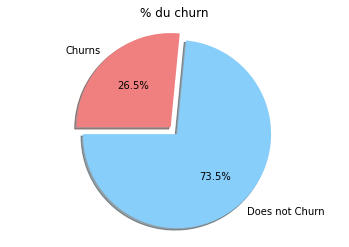

In [30]:

fig = plt.figure()
plt.pie(sizes, 
        labels=labels, 
        colors=colors,
        explode=explode,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=-180)
plt.axis('equal')
plt.title('% du churn')
plt.show()
fig.savefig('Churn_pi-chart.pdf')

In [31]:
# l'influance de l'ancienneté sur l'attrition 

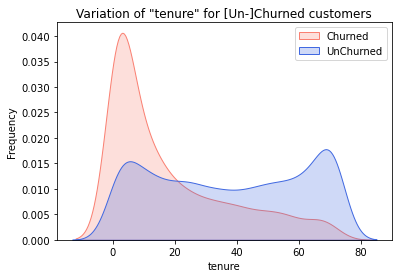

In [32]:
fig= plt.figure()
ax = sns.kdeplot(churn.tenure[(churn["Churn"] == 'Yes') ], 
                color="salmon", shade = True)
ax = sns.kdeplot(churn.tenure[(churn["Churn"] == 'No') ], 
                ax=ax, color="royalblue", shade= True)
ax.set_xlabel("tenure")
ax.set_ylabel("Frequency")
plt.title('Variation of "tenure" for [Un-]Churned customers')
ax = ax.legend(["Churned","UnChurned"])
fig.savefig('Churn_tenure_density-plot.pdf')


In [33]:
# influluence   des chagres  par mois

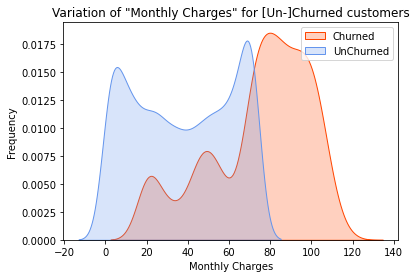

In [34]:
fig= plt.figure()
ax = sns.kdeplot(churn.MonthlyCharges[(churn["Churn"] == 'Yes') ], 
                color="orangered", shade = True)
ax = sns.kdeplot(churn.tenure[(churn["Churn"] == 'No') ], 
                ax=ax, color="cornflowerblue", shade= True)
ax.set_xlabel("Monthly Charges")
ax.set_ylabel("Frequency")
plt.title('Variation of "Monthly Charges" for [Un-]Churned customers')
ax = ax.legend(["Churned","UnChurned"])
fig.savefig('Churn_MnthlyChrgs_density-plot.pdf')

In [35]:
# total des charges 

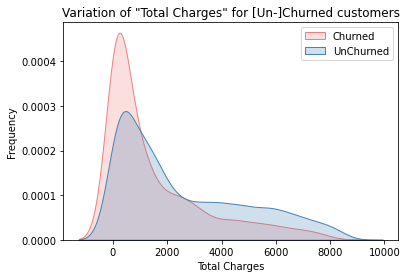

In [36]:
fig= plt.figure()
ax = sns.kdeplot(churn.TotalCharges[(churn["Churn"] == 'Yes') ], 
                color="lightcoral", shade = True)
ax = sns.kdeplot(churn.TotalCharges[(churn["Churn"] == 'No') ], 
                ax=ax, color="steelblue", shade= True)
ax.set_xlabel("Total Charges")
ax.set_ylabel("Frequency")
plt.title('Variation of "Total Charges" for [Un-]Churned customers')
ax = ax.legend(["Churned","UnChurned"])
fig.savefig('Churn_TotalChrgs_density-plot.pdf')

Text(0.5, 1.0, '% Churn in Senion Citizens = 0, 1')

<Figure size 432x288 with 0 Axes>

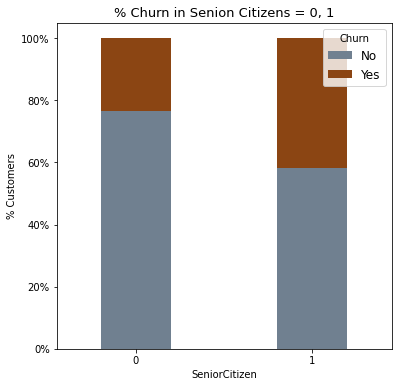

In [37]:
colors = ['slategrey','saddlebrown']
churn_sczn = churn.groupby(['SeniorCitizen','Churn']).size().unstack()
fig= plt.figure()

ax = (churn_sczn.T*100.0/ 
      churn_sczn.T.sum()).T.plot(kind='bar',
                                 width = 0.4,
                                 stacked = True,
                                 rot = 0, 
                                 figsize = (6,6),
                                 color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='upper right',prop={'size':12},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('% Churn in Senion Citizens = 0, 1',size = 13)

In [38]:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), 
                (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'normal',
                size =14)
fig.savefig('Churn_Sen-Cit_stacked-bar.pdf')

In [ ]:
# Covertir les variables categorielles en representation numérique 

In [40]:
churnum = churn.copy()

map_num = {"gender":           {"Male":1, "Female": 0},
           "Partner":          {"Yes": 1,  "No": 0},
           "Dependents":       {"Yes": 1,  "No": 0},
           "PhoneService":     {"Yes": 1,  "No": 0},
           "MultipleLines":    {"Yes": 2,  "No": 1, "No phone service": 0},
           "InternetService":  {"Fiber optic"  : 2,   "DSL": 1,   "No": 0},
           "OnlineSecurity":   {"Yes": 2,  "No": 1, "No internet service": 0},
           "OnlineBackup":     {"Yes": 2,  "No": 1, "No internet service": 0},
           "DeviceProtection": {"Yes": 2,  "No": 1, "No internet service": 0},
           "TechSupport":      {"Yes": 2,  "No": 1, "No internet service": 0},
           "StreamingTV":      {"Yes": 2,  "No": 1, "No internet service": 0},
           "StreamingMovies":  {"Yes": 2,  "No": 1, "No internet service": 0},
           "Contract":         {"Month-to-month": 1,
                                "One year"      : 12,
                                "Two year"      : 24},
           "PaperlessBilling": {"Yes": 1,  "No": 0},
           "PaymentMethod":    {"Electronic check"          : 1,
                                "Mailed check"              : 0,
                                "Bank transfer (automatic)" : 2,
                                "Credit card (automatic)"   : 3},
           "Churn":            {"Yes": 1,  "No": 0}
          }

churnum.replace(map_num, inplace=True)

In [ ]:
# On divise nos données en X er Y
# Y contient la variable a prédir 

In [43]:
X = churnum.values[:, :19]
y = churnum.values[:,  19]


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 39)

In [ ]:
SVM

In [48]:

model_svm = SVC(kernel='poly',  ##  ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
                degree = 1,
                max_iter = 2000,
                random_state = 39)

model_svm.fit(X_train, y_train)



/home/tina/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=2000, probability=False, random_state=39, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
y_pren_svm = model_svm.predict(X_train)
y_pret_svm = model_svm.predict(X_test)

In [54]:
cm_svm = confusion_matrix(y_train, y_pren_svm)
accu_svm = accuracy_score(y_train, y_pren_svm)
sens_svm = cm_svm[0,0]/float(cm_svm[0,0]+cm_svm[0,1])
spec_svm = cm_svm[1,1]/float(cm_svm[1,0]+cm_svm[1,1])
fpr, tpr, thsld = metrics.roc_curve(y_train, y_pren_svm, pos_label=1)

print("\n")
print("Confusion Matrix for SVM_train : \n", cm_svm)
print("Accuracy for SVM_train is : ", round(accu_svm*100, 2), "%")
print("Sensitivity for SVM_train = ", round(sens_svm*100, 2), "%")
print("Specificity for SVM_train = ", round(spec_svm*100, 2), "%")
print("The AUC-ROC for SVM_train : ", round(metrics.auc(fpr, tpr)*100, 2), "%" )



Confusion Matrix for SVM_train : 
 [[4139    0]
 [1495    0]]
Accuracy for SVM_train is :  73.46 %
Sensitivity for SVM_train =  100.0 %
Specificity for SVM_train =  0.0 %
The AUC-ROC for SVM_train :  50.0 %


In [56]:
cm_svm = confusion_matrix(y_test, y_pret_svm)
accu_svm = accuracy_score(y_test, y_pret_svm)
sens_svm = cm_svm[0,0]/float(cm_svm[0,0]+cm_svm[0,1])
spec_svm = cm_svm[1,1]/float(cm_svm[1,0]+cm_svm[1,1])
fpr, tpr, thsld = metrics.roc_curve(y_test, y_pret_svm, pos_label=1)

print("\n")
print("Confusion Matrix for SVM_test  : \n", cm_svm)
print("Accuracy for SVM_test is  : ", round(accu_svm*100, 2), "%")
print("Sensitivity for SVM_test  = ", round(sens_svm*100, 2), "%")
print("Specificity for SVM_test  = ", round(spec_svm*100, 2), "%")
print("The AUC-ROC for SVM_test  : ", round(metrics.auc(fpr, tpr)*100, 2), "%")
print( "\n")



Confusion Matrix for SVM_test  : 
 [[1035    0]
 [ 374    0]]
Accuracy for SVM_test is  :  73.46 %
Sensitivity for SVM_test  =  100.0 %
Specificity for SVM_test  =  0.0 %
The AUC-ROC for SVM_test  :  50.0 %


